In [108]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [503]:
from transformers import pipeline
import random
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [505]:
df = pd.read_csv("data/songListCleaned.csv")
# labels = {
#     # Valence
#     "high valence": [0.7, 1.0],
#     "medium valence": [0.3, 0.7],
#     "low valence": [0.0, 0.3],

#     # Popularity
#     "high popularity": [0.7, 1.0],
#     "medium popularity": [0.3, 0.7],
#     "low popularity": [0.0, 0.3],

#     # Duration (normalized to [0.0, 1.0])
#     "high duration": [0.7, 1.0],
#     "medium duration": [0.3, 0.7],
#     "short duration": [0.0, 0.3],

#     # Danceability
#     "high danceability": [0.7, 1.0],
#     "medium danceability": [0.3, 0.7],
#     "low danceability": [0.0, 0.3],

#     # Energy
#     "high energy": [0.7, 1.0],
#     "medium energy": [0.3, 0.7],
#     "low energy": [0.0, 0.3],

#     # Loudness (normalized to [0.0, 1.0])
#     "high loudness": [0.7, 1.0],
#     "medium loudness": [0.3, 0.7],
#     "low loudness": [0.0, 0.3],

#     # Speechiness
#     "high speechiness": [0.7, 1.0],
#     "medium speechiness": [0.3, 0.7],
#     "low speechiness": [0.0, 0.3],

#     # Acousticness
#     "high acousticness": [0.7, 1.0],
#     "medium acousticness": [0.3, 0.7],
#     "low acousticness": [0.0, 0.3],

#     # Instrumentalness
#     "high instrumentalness": [0.7, 1.0],
#     "medium instrumentalness": [0.3, 0.7],
#     "low instrumentalness": [0.0, 0.3],

#     # Liveness
#     "high liveness": [0.7, 1.0],
#     "medium liveness": [0.3, 0.7],
#     "low liveness": [0.0, 0.3],

#     # Tempo (normalized to [0.0, 1.0])
#     "high tempo": [0.7, 1.0],
#     "medium tempo": [0.3, 0.7],
#     "low tempo": [0.0, 0.3],
# }

In [507]:
# # Define min and max values for each feature (adjust based on your dataset)
# feature_ranges = {
#     "valence": (0.0, 1.0),
#     "popularity": (0, 100),
#     "duration_ms": (8586, 5237295),  # Adjust based on your dataset
#     "danceability": (0.0, 0.985),
#     "energy": (0.0, 1.0),
#     "loudness": (-49.531, 4.532),  # Loudness ranges from -60 dB to 0 dB
#     "speechiness": (0.0, 0.965),
#     "acousticness": (0.0, 0.996),
#     "instrumentalness": (0.0, 1.0),
#     "liveness": (0.0, 1.0),
#     "tempo": (0, 243.372),  # Tempo ranges from 0 BPM to 250 BPM
# }

# # Normalize features to [0.0, 1.0]
# for feature, (min_val, max_val) in feature_ranges.items():
#     df[f"{feature}_normalized"] = (df[feature] - min_val) / (max_val - min_val)

# # Display the updated dataset
# print(df.head())

In [509]:
#remove trash columns
df = df.drop(['Unnamed: 0.1', 'artists', 'album_name', 'track_name', 'explicit', 'key',
        'mode', 'time_signature'], axis=1)

14
[24.33680521 42.06213859]


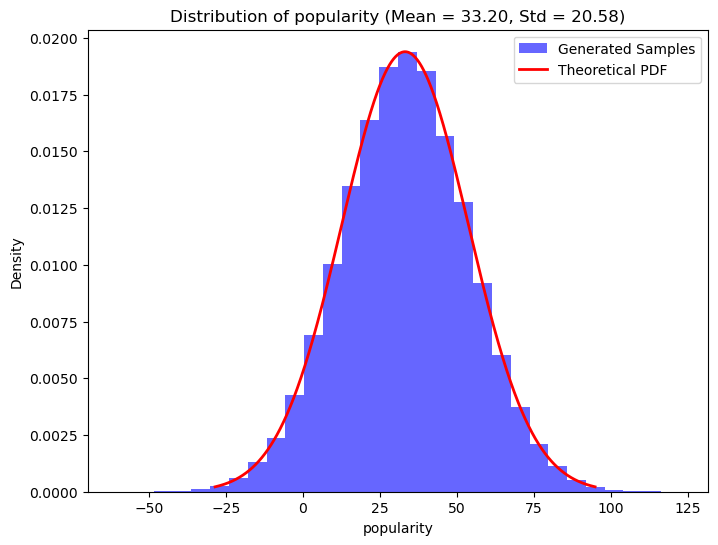

[180494.49920464 277791.12563666]


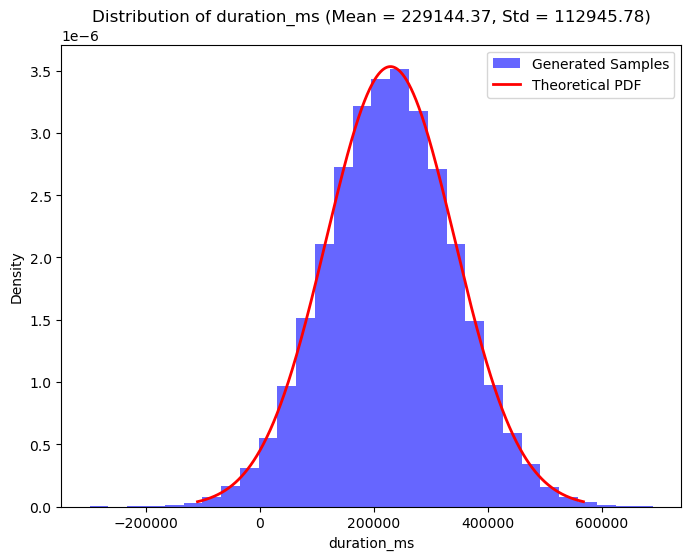

[0.48605866 0.63826919]


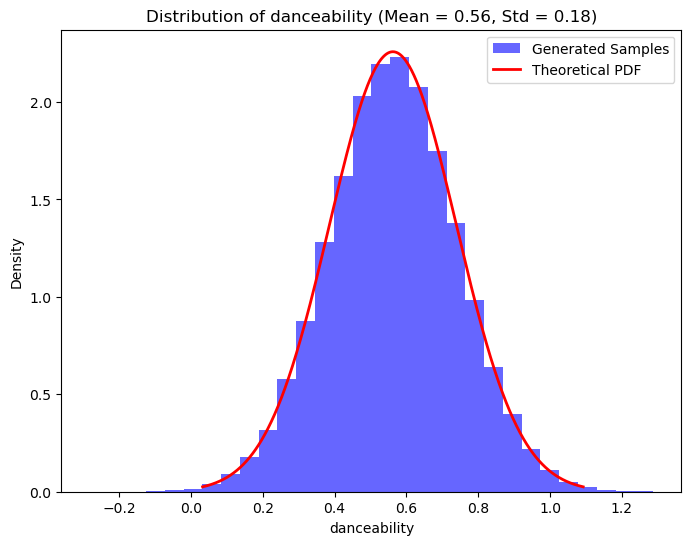

[0.52392875 0.74498114]


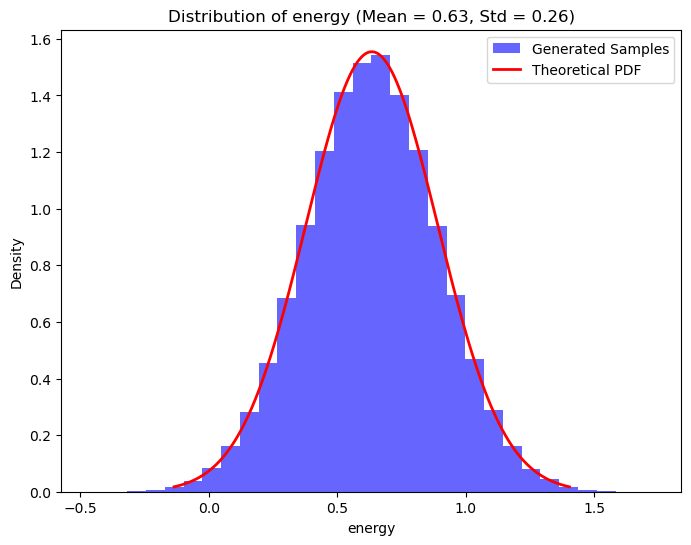

[-10.74809182  -6.25003931]


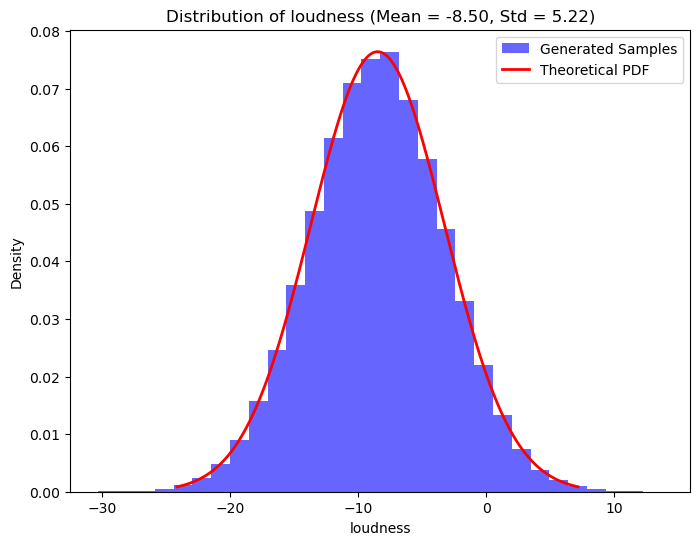

[0.03864951 0.13623205]


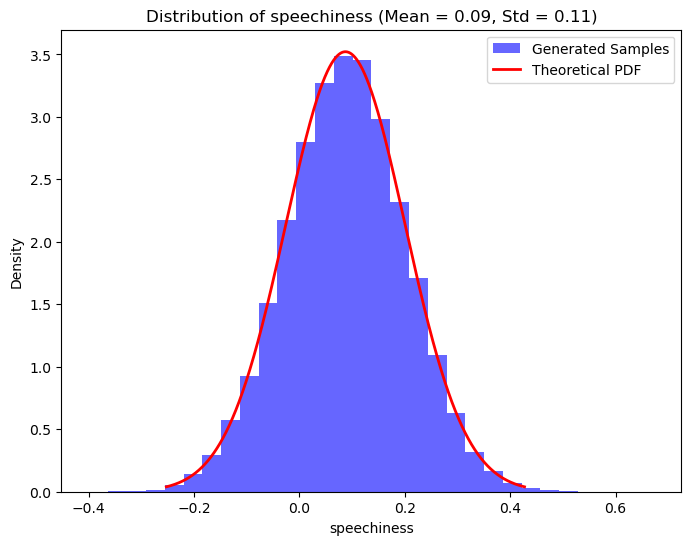

[0.18255797 0.47400267]


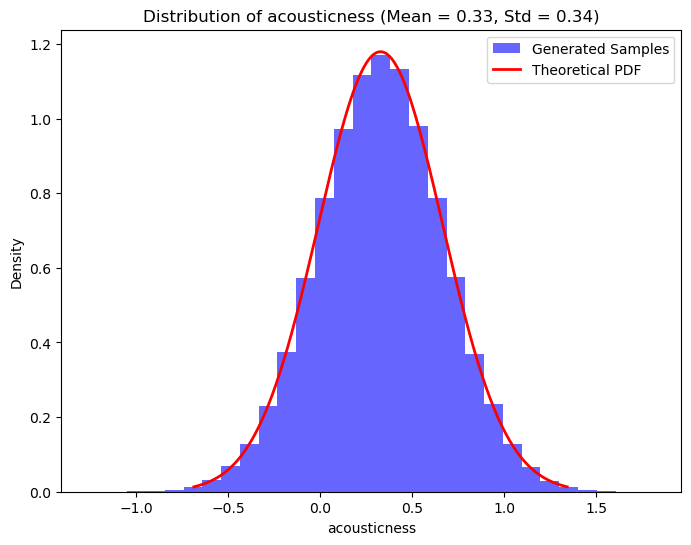

[0.03392167 0.31290016]


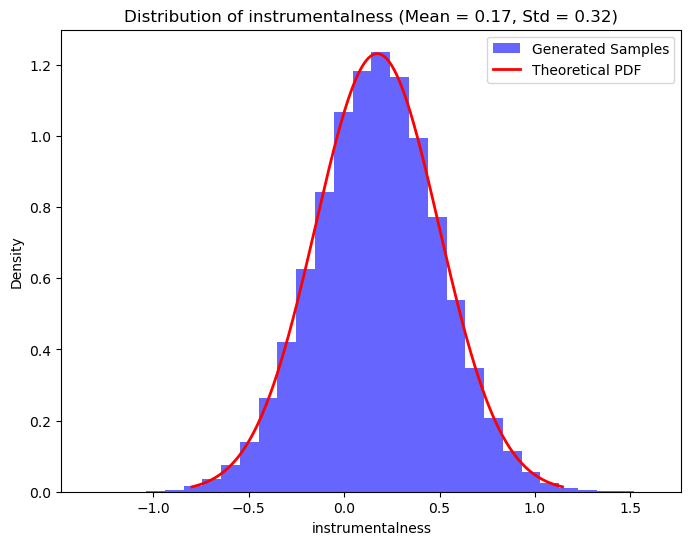

[0.13302708 0.30090977]


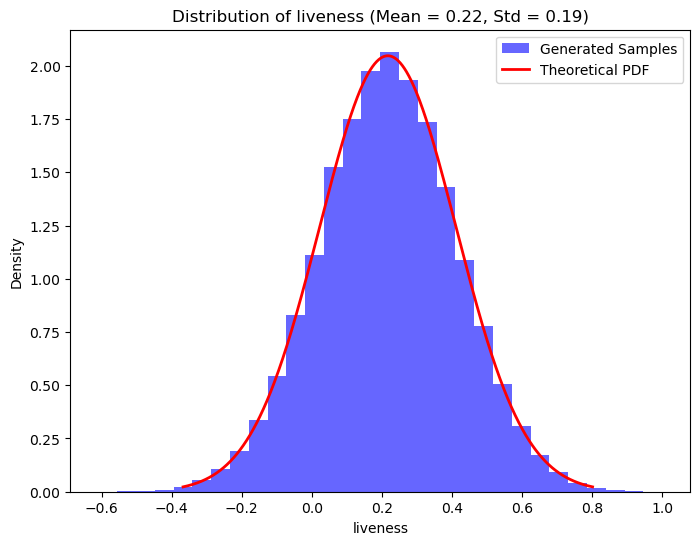

[0.35624953 0.58269212]


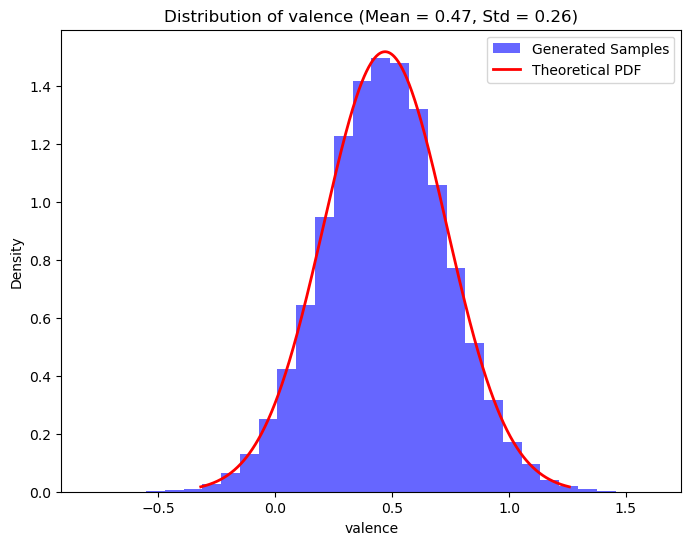

[109.08536386 135.03007629]


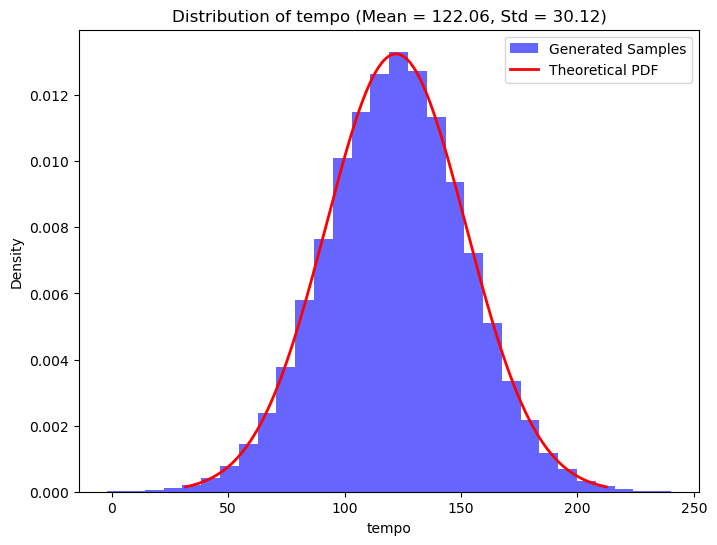

{'high popularity': [42.06213858625163, 100], 'medium popularity': [24.336805205185797, 42.06213858625163], 'low popularity': [0, 24.336805205185797], 'high duration_ms': [277791.1256366565, 5237295], 'medium duration_ms': [180494.499204635, 277791.1256366565], 'low duration_ms': [8586, 180494.499204635], 'high danceability': [0.6382691939772152, 0.985], 'medium danceability': [0.48605865656399494, 0.6382691939772152], 'low danceability': [0.0, 0.48605865656399494], 'high energy': [0.7449811392830035, 1.0], 'medium energy': [0.5239287468845211, 0.7449811392830035], 'low energy': [0.0, 0.5239287468845211], 'high loudness': [-6.2500393083862695, 4.532], 'medium loudness': [-10.748091817015506, -6.2500393083862695], 'low loudness': [-49.531, -10.748091817015506], 'high speechiness': [0.13623204572910647, 0.965], 'medium speechiness': [0.03864950564260645, 0.13623204572910647], 'low speechiness': [0.0, 0.03864950564260645], 'high acousticness': [0.4740026692392782, 0.996], 'medium acoustic

In [511]:
labels = {}

# Loop through the specified columns
print(len(df.columns))
for col in df.columns[2:13]:
    # Calculate mean and standard deviation
    mn = df[col].mean()
    std = df[col].std()
    min = df[col].min()
    max = df[col].max()
    quantiles = norm.ppf([0.33333, 0.66666], loc=mn, scale=std)

    print(quantiles)

    # Generate random samples from the normal distribution
    samples = norm.rvs(loc=mn, scale=std, size=len(df))
    
    labels["high " + col] = [quantiles[1], max]
    labels["medium " + col] = [quantiles[0], quantiles[1]]
    labels["low " + col] = [min, quantiles[0]]
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the histogram of the generated samples
    ax.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label='Generated Samples')

    # Plot the theoretical PDF
    x = np.linspace(mn - 3 * std, mn + 3 * std, 1000)  # Range for the PDF
    pdf = norm.pdf(x, loc=mn, scale=std)  # Calculate the PDF
    ax.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

    # Add labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {col} (Mean = {mn:.2f}, Std = {std:.2f})')
    ax.legend()

    # Show the plot
    plt.show()

print(labels)

[0.35624953 0.58269212]


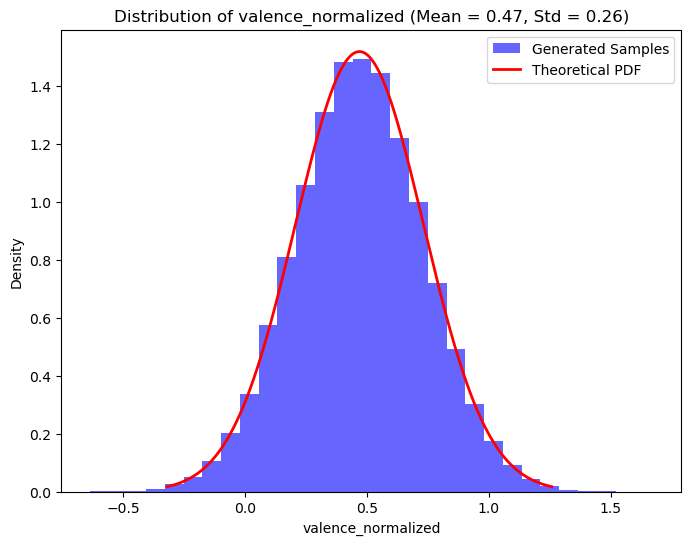

[0.24336805 0.42062139]


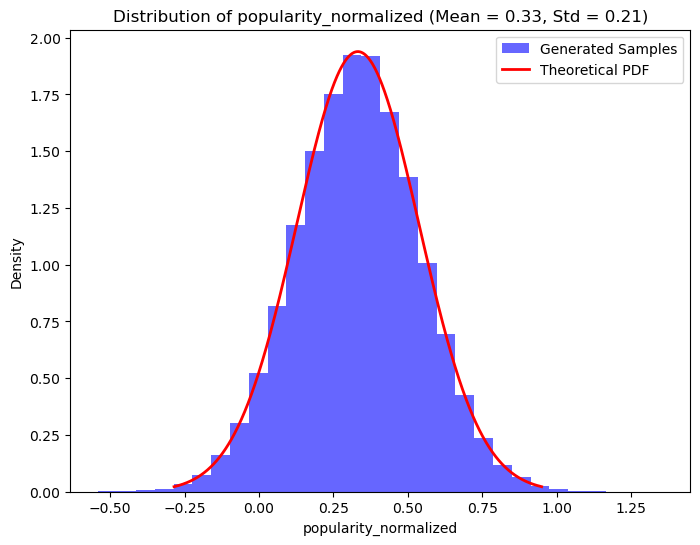

[0.03287781 0.05148596]


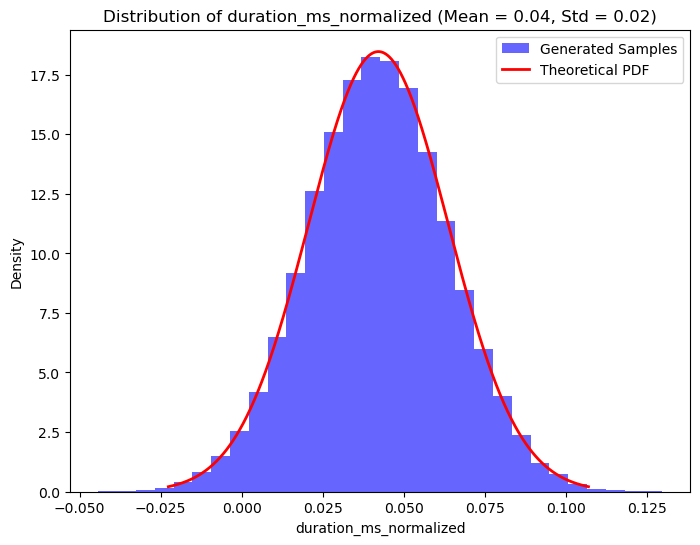

[0.49346057 0.64798903]


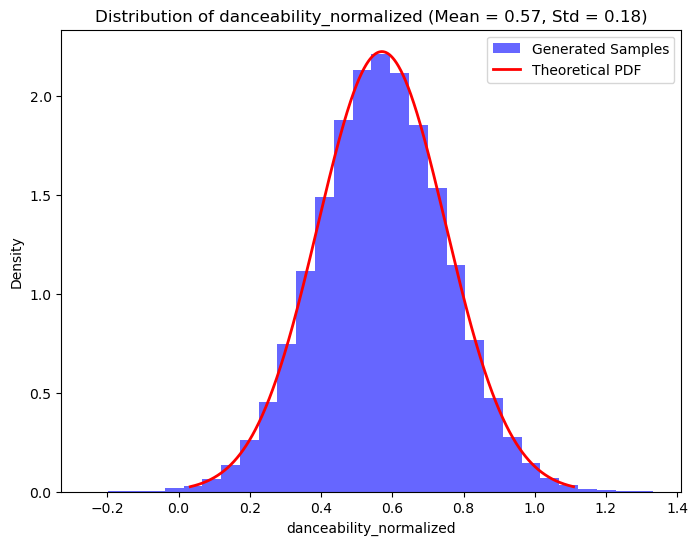

[0.52392875 0.74498114]


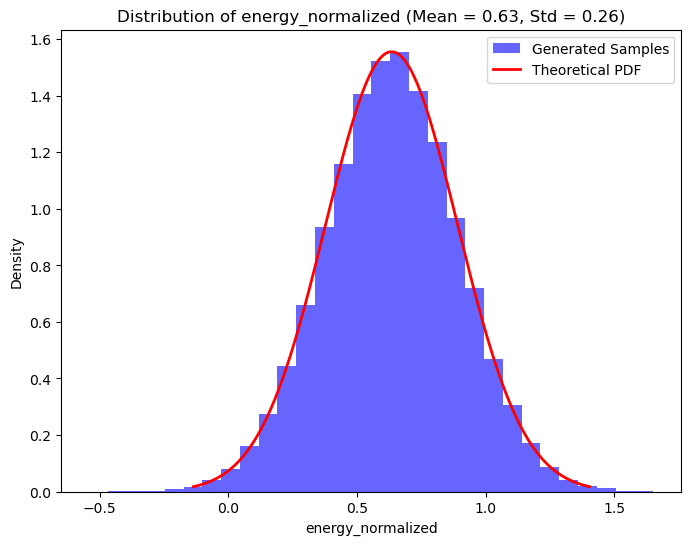

[0.71736508 0.80056528]


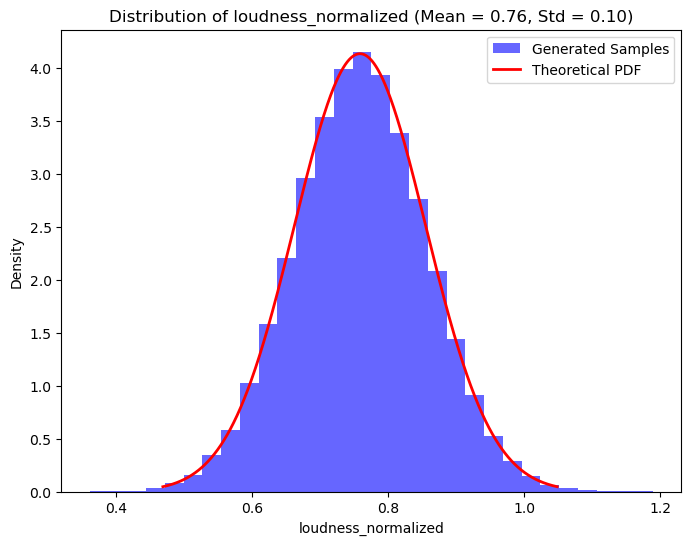

[0.0400513 0.1411731]


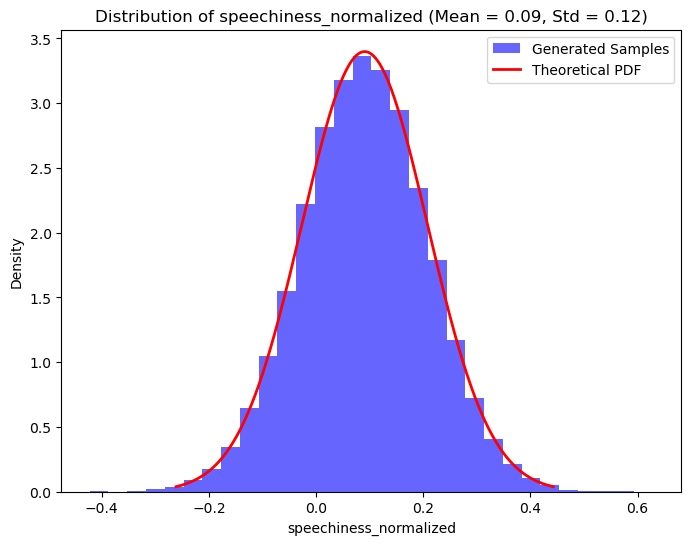

[0.18329113 0.47590629]


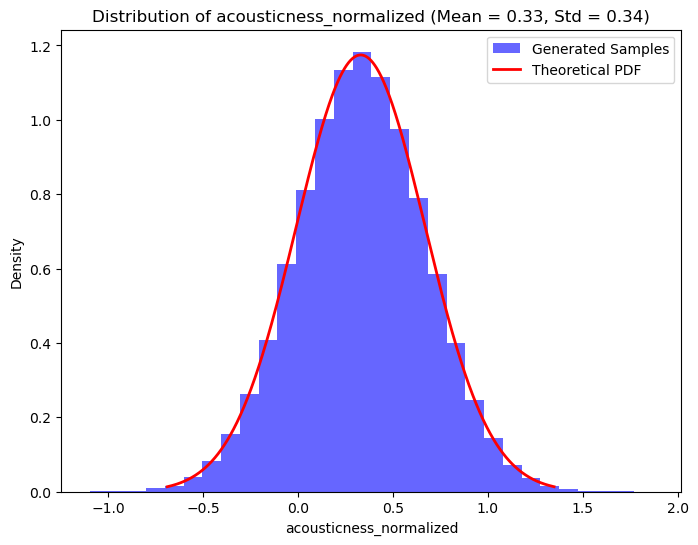

[0.03392167 0.31290016]


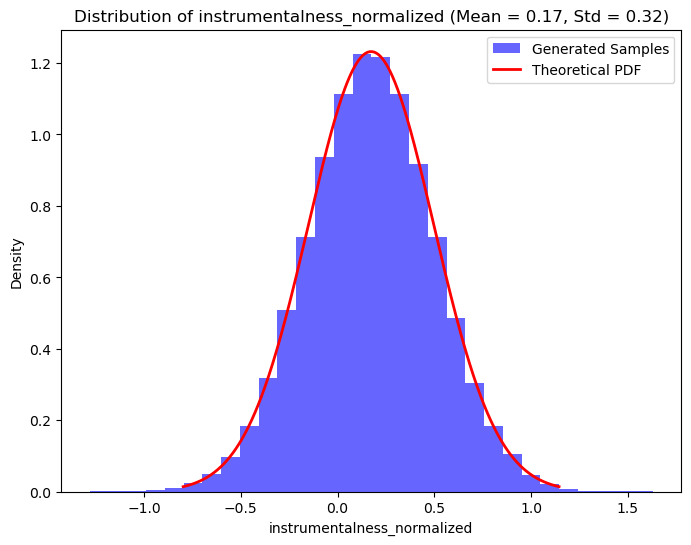

[0.13302708 0.30090977]


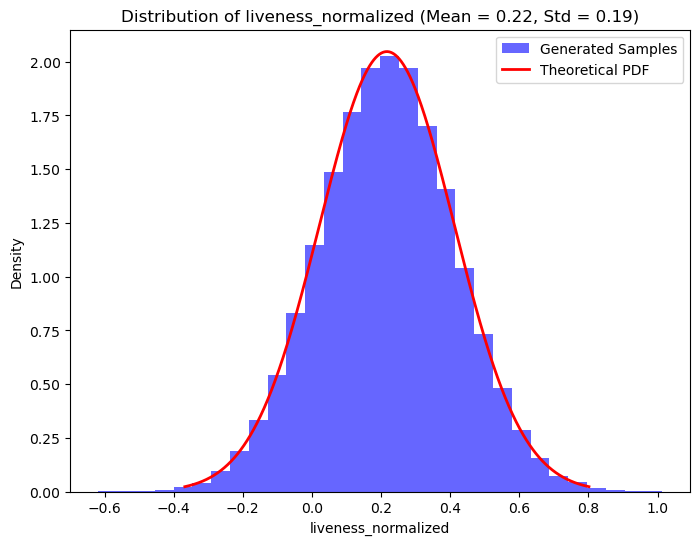

[0.44822479 0.55482996]


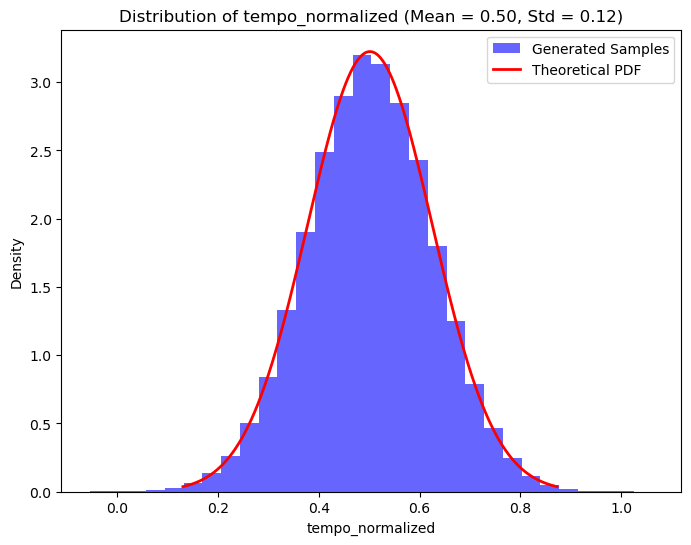

dict_keys(['high valence_normalized', 'medium valence_normalized', 'low valence_normalized', 'high popularity_normalized', 'medium popularity_normalized', 'low popularity_normalized', 'high duration_ms_normalized', 'medium duration_ms_normalized', 'low duration_ms_normalized', 'high danceability_normalized', 'medium danceability_normalized', 'low danceability_normalized', 'high energy_normalized', 'medium energy_normalized', 'low energy_normalized', 'high loudness_normalized', 'medium loudness_normalized', 'low loudness_normalized', 'high speechiness_normalized', 'medium speechiness_normalized', 'low speechiness_normalized', 'high acousticness_normalized', 'medium acousticness_normalized', 'low acousticness_normalized', 'high instrumentalness_normalized', 'medium instrumentalness_normalized', 'low instrumentalness_normalized', 'high liveness_normalized', 'medium liveness_normalized', 'low liveness_normalized', 'high tempo_normalized', 'medium tempo_normalized', 'low tempo_normalized'])

In [467]:
# modified_labels = {}
# # Loop through the specified columns
# for col in df.columns[22:]:
#     # Calculate mean and standard deviation
#     mn = df[col].mean()
#     std = df[col].std()
#     min = df[col].min()
#     max = df[col].max()
#     quantiles = norm.ppf([0.33333, 0.66666], loc=mn, scale=std)

#     print(quantiles)

#     # Generate random samples from the normal distribution
#     samples = norm.rvs(loc=mn, scale=std, size=len(df))
    
#     modified_labels["high " + col] = [mn + quantiles[1], max]
#     modified_labels["medium " + col] = [quantiles[0], quantiles[1]]
#     modified_labels["low " + col] = [min, quantiles[0]]
    
#     # Create a figure and axis for the plot
#     fig, ax = plt.subplots(figsize=(8, 6))

#     # Plot the histogram of the generated samples
#     ax.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label='Generated Samples')

#     # Plot the theoretical PDF
#     x = np.linspace(mn - 3 * std, mn + 3 * std, 1000)  # Range for the PDF
#     pdf = norm.pdf(x, loc=mn, scale=std)  # Calculate the PDF
#     ax.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

#     # Add labels and title
#     ax.set_xlabel(col)
#     ax.set_ylabel('Density')
#     ax.set_title(f'Distribution of {col} (Mean = {mn:.2f}, Std = {std:.2f})')
#     ax.legend()

#     # Show the plot
#     plt.show()

# print(modified_labels.keys())

In [513]:
for index, rows in df.iterrows():
    curr = rows["track_genre"].split(",")
    for gen in curr:
        if gen not in labels:
            labels[gen] = None

print(labels.keys())

dict_keys(['high popularity', 'medium popularity', 'low popularity', 'high duration_ms', 'medium duration_ms', 'low duration_ms', 'high danceability', 'medium danceability', 'low danceability', 'high energy', 'medium energy', 'low energy', 'high loudness', 'medium loudness', 'low loudness', 'high speechiness', 'medium speechiness', 'low speechiness', 'high acousticness', 'medium acousticness', 'low acousticness', 'high instrumentalness', 'medium instrumentalness', 'low instrumentalness', 'high liveness', 'medium liveness', 'low liveness', 'high valence', 'medium valence', 'low valence', 'high tempo', 'medium tempo', 'low tempo', 'german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'chill', 'soul', 'ska', 'punk-rock', 'bluegrass', 'happy', 'drum-and-bass', 'idm', 'alternative', 'rock', 'alt-rock', 'emo', 'sad', 'honky-tonk', 'industrial', 'j-dance', 'grindcore', 'french', 'world-music', 'hard-rock', 'pagode', 'forro', 'sertanejo', 'j-rock', 'turkish', 'j-pop', 'jazz', 'indian', 'chi

In [515]:
text = "I want songs that are sad"
classes_verbalized = list(labels.keys())
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0")  # change the model identifier here
output = zeroshot_classifier(text, classes_verbalized, multi_label=True)
print(output)
#MoritzLaurer/ModernBERT-large-zeroshot-v2.0
#MoritzLaurer/deberta-v3-large-zeroshot-v2.0

Device set to use mps:0


{'sequence': 'I want songs that are sad', 'labels': ['low danceability', 'low valence', 'low energy', 'low tempo', 'sad', 'low liveness', 'low instrumentalness', 'low speechiness', 'low loudness', 'songwriter', 'low duration_ms', 'singer-songwriter', 'emo', 'low popularity', 'blues', 'edm', 'alternative', 'folk', 'idm', 'high duration_ms', 'medium popularity', 'medium speechiness', 'low acousticness', 'medium loudness', 'medium duration_ms', 'medium liveness', 'r-n-b', 'high popularity', 'medium instrumentalness', 'medium acousticness', 'indie', 'goth', 'soul', 'medium energy', 'high acousticness', 'mpb', 'alt-rock', 'medium tempo', 'cantopop', 'high speechiness', 'indie-pop', 'guitar', 'medium danceability', 'pagode', 'high valence', 'rock-n-roll', 'acoustic', 'mandopop', 'medium valence', 'dub', 'comedy', 'study', 'forro', 'deep-house', 'children', 'grunge', 'kids', 'rock', 'high loudness', 'country', 'pop-film', 'pop', 'piano', 'electronic', 'k-pop', 'club', 'garage', 'j-idol', 'hig

In [517]:
def generate_zsc_output(prompt):
    classes_verbalized = list(labels.keys())
    zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0")
    output = zeroshot_classifier(prompt, classes_verbalized, multi_label=True)
    return output

In [523]:
test_playlist = [df.iloc[random.randint(0, len(df))]["track_id"] for i in range(100)]

#use_labels = [output["labels"][x] for x in range(len(output["labels"])) if output["scores"][x] > 0.95]
#METHOD 1: normal --> using top three labels. if a song fits ANY of the three criteria, it is added
#TODO: change this to work with new file format --> genre having multiple values

test_input = "I want the songs that are happy"
output = generate_zsc_output(test_input)
use_labels = [output["labels"][x] for x in range(3)]
print(len(use_labels))

final_playlist = []
for label in use_labels:
    print(label)
    label_val = labels[label]
    col = None 
    if label_val is None:
        #if the label is a genre
        col = "track_genre"
    else:
        #if label is any other category
        ind = classes_verbalized.index(label)
        col = list(feature_ranges.keys())[ind // 3]
    for song_id in test_playlist:
        row = df[df["track_id"] == song_id]
        if (col == "track_genre"):
            if row[col].iloc[0] == label:
                if song_id not in final_playlist:
                    final_playlist.append(song_id)
        else:
            min = label_val[0]
            max = label_val[1]
            if row[col].iloc[0] <= max and row[col].iloc[0] >= min:
                if song_id not in final_playlist:
                    final_playlist.append(song_id)
print(len(final_playlist))

Device set to use mps:0


3
low speechiness
high valence
low tempo
37


In [374]:
test_playlist = [df.iloc[random.randint(0, len(df))]["track_id"] for i in range(100)]

#use_labels = [output["labels"][x] for x in range(len(output["labels"])) if output["scores"][x] > 0.95]
#METHOD 2: only songs that fit ALL THREE criteria
test_input = "I want the songs that are sad"
output = generate_zsc_output(test_input)
use_labels = [output["labels"][x] for x in range(3)]
print(use_labels)
final_playlist = []
for song_id in test_playlist:
    row = df[df["track_id"] == song_id]
    satisfies_all = True
    for label in use_labels:
        label_val = labels[label]
        if label_val is None:
            if row["track_genre"].iloc[0] != label:
                satisfies_all = False
                break
        else:
            ind = classes_verbalized.index(label)
            col = list(feature_ranges.keys())[ind // 3] + "_normalized"
            min = label_val[0]
            max = label_val[1]
            if not (row[col].iloc[0] <= max and row[col].iloc[0] >= min):
                satisfies_all = False
                break
    if satisfies_all:
        final_playlist.append(song_id)
            

print(len(final_playlist))

Device set to use mps:0


['low danceability', 'low speechiness', 'low energy']
4


In [361]:
mod = "MoritzLaurer/deberta-v3-large-zeroshot-v2.0"
def generate_subplaylist(playlist, prompt):
    final_playlist = []
    print(prompt)
    zsc = pipeline("zero-shot-classification", model=mod)
    output = zsc(prompt, classes_verbalized, multi_label=True)

    use_labels = [output["labels"][x] for x in range(len(output["labels"])) if output["scores"][x] > 0.8]

    for label in use_labels:
        label_type = type(labels[label])
        #for song in test_playlist:
        print(label_type)   

generate_subplaylist(test_playlist, test_input)


I want the songs that are happy


Device set to use mps:0


<class 'list'>
<class 'list'>
<class 'NoneType'>
<class 'list'>
<class 'NoneType'>
<class 'NoneType'>
